# Ensemble Learning

What is the difference between a NN and an Enemble.
With a NN we already have the architecture and we are learning the weights while with ensemble learning we are building rules and combineing them as we go along. 

Think an ensamle of little rules that are combined.
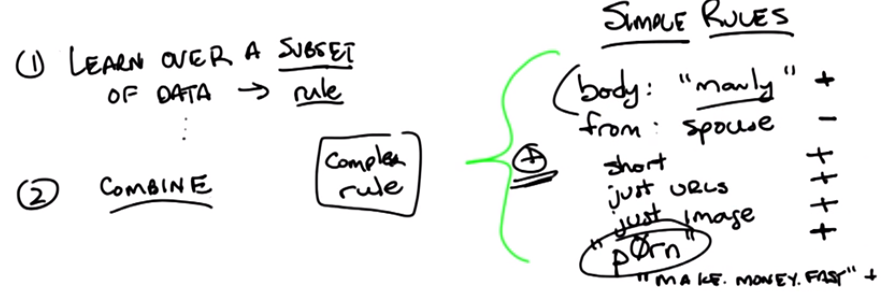

Learn over a subset of the data that then generates a rule. The implication of this is that the individual rules might be good with their subset but not the other subsets. 

Once all the rules have been collected we then combine them.

**Some possible techniques**

**Selecting of subsets**
* The simplest method is uniform randomly select the subsets. Subsets are not unique.

Why don't we look at all the data? It makes it harder to find simple rules. (Will be elaborated on later)

**Combination of rules**(Imagine we are doing regression)
* The simplest method of combining would be using the *mean*

## Quiz
Note the danger in how we select the how to select the subset and mean.

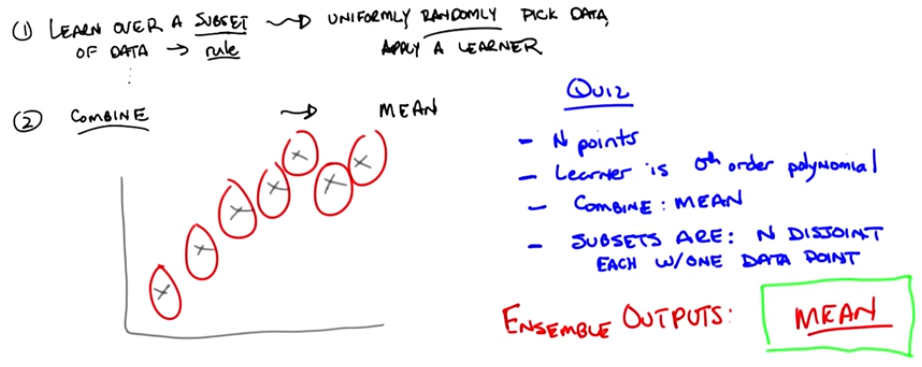

**NOTE** This is very similar to k-NN, where $k=N$

## Bagging / Bootstrap Aggregation
Technique: Random subset and combine by the mean

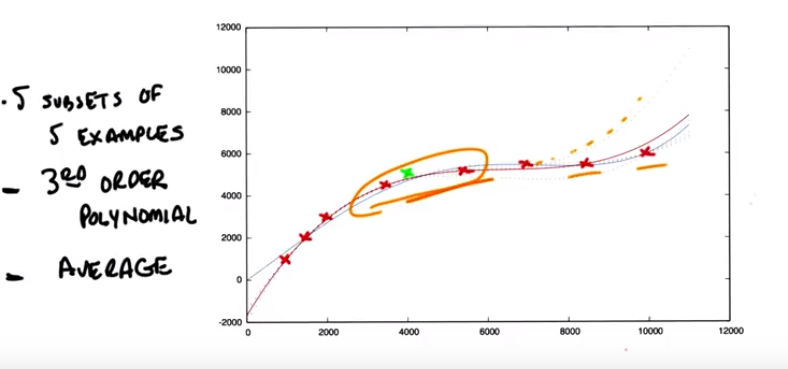

* The *blue line* is a 4th order polynomial trained on all the red data. 
* The *red line* is the average of all the 3rd order polynomials.
* The orange line is one of the simple 3rd order polynomails which just never saw the last two data points because of how the subset was randomised.

**Result** The blue line almost always outperformed the red line on the training set, but the red line almost always outperformed the blue line on test set.

**Take away:** In a way, by taking all these subsets and training on them individually it does the same thing as cross validation - ie it prevents the model from getting misslead by noise. And then by combining these simpler models back together we average out the variance and differences. 

Problems

## Boosting

**Subsetting**
* Choose subsets that the model doesn't perform well - focus on data that it is performing badly on

**Combining**
* Weighted mean/vote

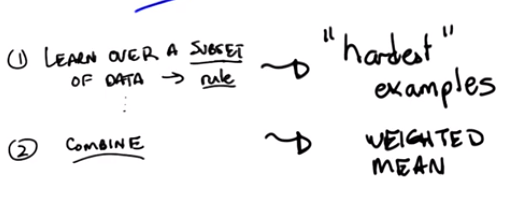

How do we prevent ossiclation of the model going back and forth between subsets? That is why we use weighting.

### Defining the error and what "hard means"

Boosting is going to use this trick of distribution to define what "hard is". We pass through the distribution to communicate what data points to focus on.

Uptill now we defined error as some metric of mismatches with the underlying assumption that the training and future testing set have the same distribution.

**(Modified) Error:** $\text{Pr}_D[h(x)\neq c(x)]$
* $\text{Pr}_D$ - probability given distribution $D$ 
* $h(x)$ - hyothesis output
* $c(x)$ - true result (true concept)

i.e. The error is the probability given the underlying distribution that I will disagree with the true concept with some instance $x$ 

#### Example

If we had 2/4 data points correctly predicted then we would have an error of 1/2. **BUT** if we looked the distribution of how often we would see each data point (in a way assigning them weights) we would get an error of 1/10.

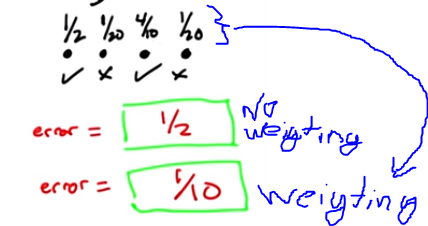

Don't think of error as the number of distinct mistakes that you can make, but rather the amount of time you will make mistakes. 

### Weak Learning

Definition: **Weak learner** 

A weak learner is defined to be a classifier which is only slightly correlated with the true classification (it can label examples better than random guessing).

i.e. A learner (algorithm) no matter what your distrubution is, will do better then chance. 

$$\text{Pr}_D[h(x)\neq c(x)] \leq \frac{1}{2} - \epsilon \text{ } \forall D $$

i.e. the error is less then $1/2 - \epsilon$

#### Example

What makes a good or bad $D$

1) Find a distibution over the four examples s.t. learning algo that has to choose between one of those hypothesis will be able to find a hypothesis that does better then chance.

2) Do the same as above, but find a distibution that does no better then chance. 

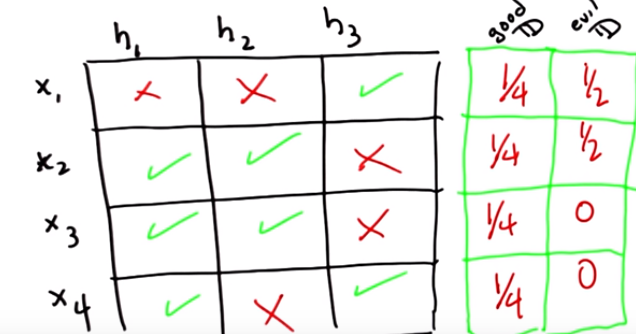

i.e. There is a distribution for which non of the hypothesis do better then chance $\Rightarrow$ there is no weak learner.

The following is an example of having a weak learner.
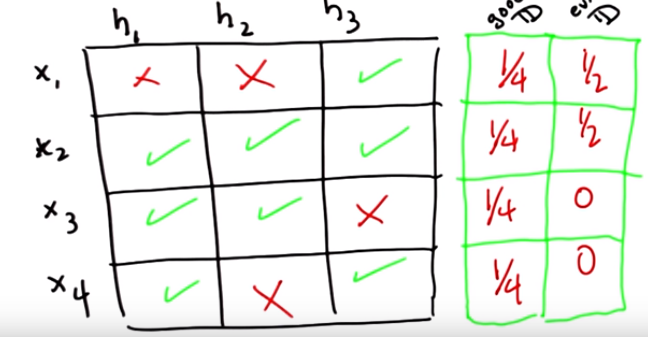

NOTE: 
* If we had more hypothsis and more examples, we could get more ways to find a weak learner. 
* If you have alot of hypothsis that are bad at everything. Bad time with a weak learner.
* If you have alot of hypothsis that are good at almost everything, its easy to have a weak learner. 

## Boosting Pseudo Code

Binary classification

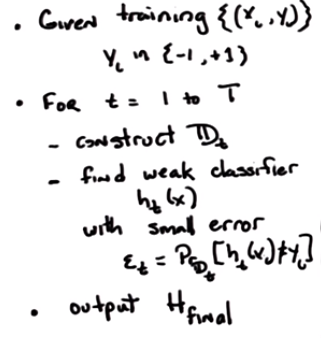

### Finding the distribution

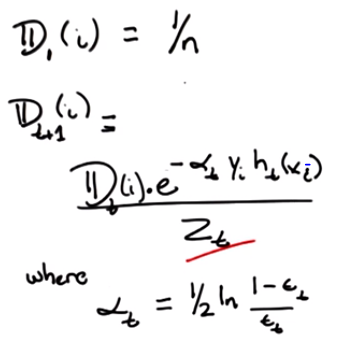

$y_i$ and $h_t(x_i)$ will both return either $+1$ or $-1$. 

Think of $\alpha$ as a measure of how good a weak hypothesis was (check out the readings)

$Z$ is a positive number, what ever normalisation constant we need for all the results $D_t(i)$ to be a valid distribution $D_t$.

If the hypothesis at time $t$ agrees with the label at time $t$?
* When they agree, the product is $+1$
* When they disagree, the product is $-1$

What happens to $D_t(i)$ when $h_t$ & $y_i$ agree? ***It depends on what else is going on - depends on how $z$ and $\alpha$ is defined wrt to how everything else is agreeing vs disagreeing (look at readings for more information)***

If all of them (examples $i$) are the same?
* Stay the same

If the results agree and you disagree on at least one example?
* Decrease 

If when they disagree and at least one other examples agrees?
* Increase

**Take away 1:** puts more weight on those it gets wrong and less wieght on those it gets right.

**Take away 2:** We assumed that we have a weak learner that will do better then chance on any distribution. It means that we will always be able output some learner that can get some of the ones that you are getting wrong, right.

### Constructing the final Hypothesis

Doing a weighted average of all the weak classifiers we have been selecting over all the time steps $t$
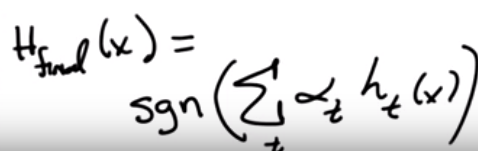

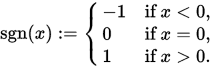

Information is being thrown away. But this will be dealt with later.

## Example
https://www.youtube.com/watch?v=u1MXf5N3wYU

The hypothesis space $H$ = {axis aligned semi-planes}

i.e. 
* axis aligned: everything on one side is either positive or negative
* semi-planes: the positive part of it is only in part of the plane

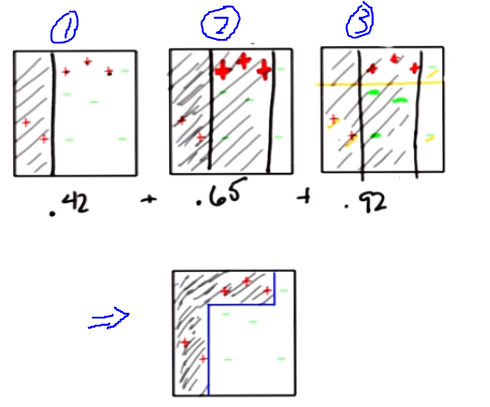

At each step, the miss classified points are given more weight (larger + or - sign). For that reason in the 3rd step, the third hypothesis divided the horizontaliy to prioritize the 3 center negative points.

Aside note: The resultant hypothesis class constructed from the hypothesis class $H$ is at least more complicated then then $H$ it self. 
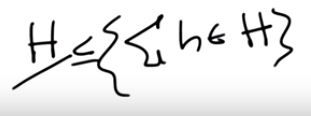

## Intuition for why Boosting does well

Refer to reading. Great explanation in section 2

*Why don't the weights oscillate between the ones being focused and ignored?*

* We have an exponentially aggressive weighting over examples. We are driving down the number of things we are getting wrong.

* You're exponentially weighting how important the training points are, so you always have to pick somthing up along the way. The ones you consistantly get right often start counting too little towards the error, inorder to maintain an error less then $1/2-\epsilon$ it needs to get right the more 'difficult' training points. 

**NOTE:** Even if we get many examples wrong, we may still get a low error rate, because in a sense some examples are more important then others. 

i.e. Suppose you have a subset of points that you initially got right, over the first few time steps their weights will become very small, hence even if you start getting that subset wrong, its affect on the error will be minimal. 

## Confidence

**Term:** *Confidence*

How strongly the algorithm belives in the answer it's provided

**Confidence Examples**
* K-NN: 3 votes vs 5 votes
* Regression: low variance (low disagrement), high variance (high disagrement)

### Boosting Confidence

Let's normalise the classifier $H(x)$:

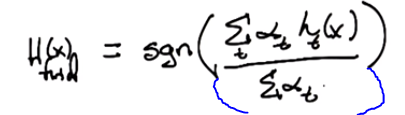

$H(x) \in [-1,1]$

**NOTE**: The $\alpha$s are all >0 as the hypothesis that were choosen had to satify the weak hypothesis condition.

We normalised $H(x)$ so that it can then be easily interpreted as a condifdence metric from -1 to 1:

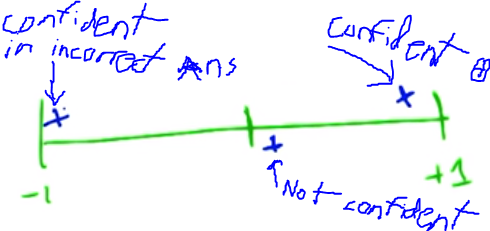

**Margin**

Suppose we have a model with a perfect clasification score. If we add more weak learners, the points near the boundary (which the model isn't confident about - hard problems) will move further to the either side. 

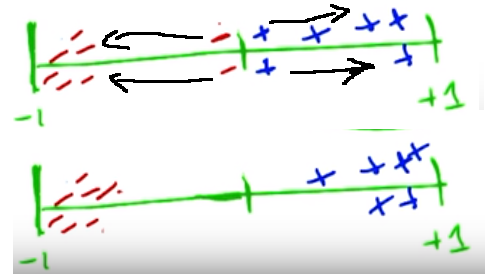



What happens then is that:
* the error stays the same
* confidence increases!

As we add more weak learners $h_t(x)$, boosting will effectivly creater a **larger margin** $\Rightarrow$ minimize overfitting

What ends up happening for boosting is the following: (No overfitting occures)
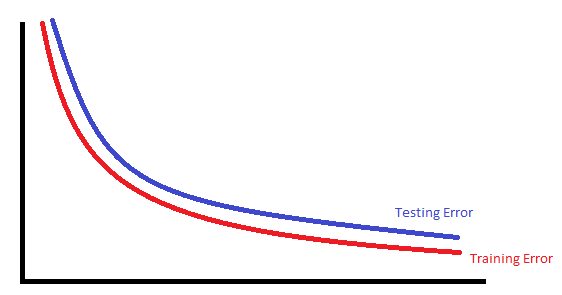

***Going back to the point about ignoring information***


### Boosting and overfitting

**Boosting tends to overfit if:**
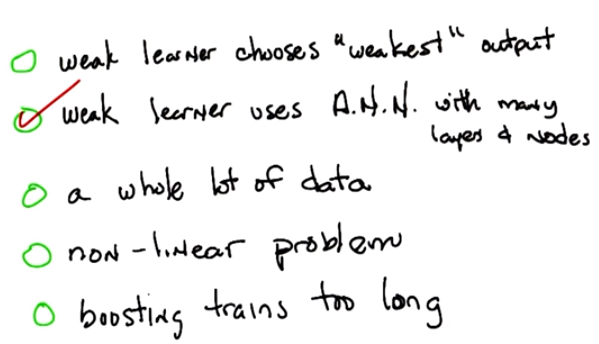

i.e. suppose we have an NN that perfectly fits the data but overfits. Then it returns no error -> all the examples will have equal weight -> the same NN will then be called in the next $t$ iteration and the same result will be returned. 

**Take away:** If the underlying learner overfits, and you can't stop it overfitting, boosting will overfit.

**Symantic note** No such think as a strong learner, as a learner that has low error is still technically a weak learner as its perofrming better then $1/2-\epsilon$

**Other cases of over fitting**
* pink noise - uniform noise 

Aside note: white noise - gausian noise

## Summary

**Advantages:**
* Computationally efficient
* No difficult parameters to set
* Versatile - a wide range of base learners can be used 

**Caveats:**
* Algorithms seems susceptible to uniform noise
* Weak learner should not be too complex - to avoid overfitting
* There needs to be enough data for the *weak learner* requirment is satisfied - the base learner should perform consistenly better than random guessing, with generalization error < 0.5 for binary classification.